In [31]:
import pandas as pd

df = pd.read_csv(r"Reviews_withURL.csv")

In [32]:
df.drop_duplicates(subset=['Text'], inplace=True)

In [34]:
df.UserId.value_counts().mean()

1.5371537704457046

In [19]:
df = df[df["HelpfulnessNumerator"] < df["HelpfulnessDenominator"]]
df = df[df["HelpfulnessDenominator"] > 3]
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]

In [20]:
df.UserId.value_counts()

A1LZJZIHUPLDV4    46
A281NPSIMI1C2R    41
A2A1XYSB692L6J    41
A1YUL9PCJR3JTY    30
A3F3B1JPACN215    29
                  ..
A1YLG0RZ2IISL8     1
A61UC1TKMPSU8      1
A2ZE67PXJVB22D     1
A10YMDRAAMISIF     1
A34GDV49ZZQKXG     1
Name: UserId, Length: 31568, dtype: int64

In [28]:
df[df.UserId == 'A1LZJZIHUPLDV4']['HelpfulnessDenominator'].sum()

686

In [30]:
df[df.UserId == 'A1LZJZIHUPLDV4']['HelpfulnessRatio'].mean()

0.816339165832122

In [3]:
df = df[df["HelpfulnessNumerator"] < df["HelpfulnessDenominator"]]
df = df[df["HelpfulnessDenominator"] > 3]
df["HelpfulnessRatio"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]

In [12]:
df.groupby(['UserId'])['HelpfulnessRatio'].mean().sort_values(ascending=False)

KeyError: 'Column not found: HelpfulnessRatio'

In [6]:
df[df.UserId == 'A14KF2FEEDGNZ9']

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,ProductURL,HelpfulnessRatio
483403,483403,483404,B0006Z7NOK,A14KF2FEEDGNZ9,Midwest Musician,321,322,5,1308614400,An eight month experiment that changed my life,I have taken Braggs ACV for eight straight mon...,https://www.amazon.com/dp/B0006Z7NOK,0.996894


<BarContainer object of 5 artists>

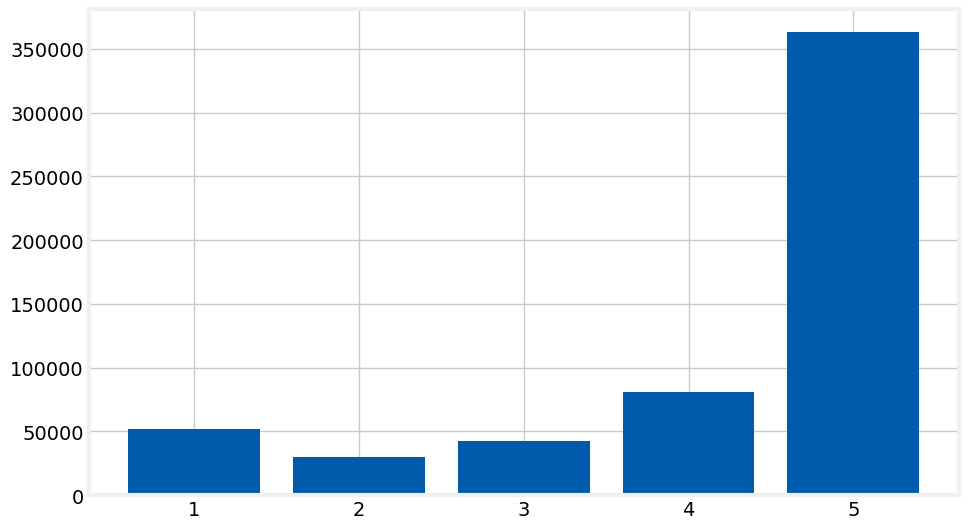

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#fff'
plt.figure(facecolor='#fff', figsize=(10, 6))

plt.bar(df.Score.value_counts().sort_index().index, df.Score.value_counts().sort_index().values, color="#005bac")

In [32]:
df['YYYY'] = pd.to_datetime(df.Time, unit='s').dt.year
df['MM'] = pd.to_datetime(df.Time, unit='s').dt.month

df['YYYY-MM'] = df['YYYY'].astype(str) + '-' + df['MM'].astype(str)

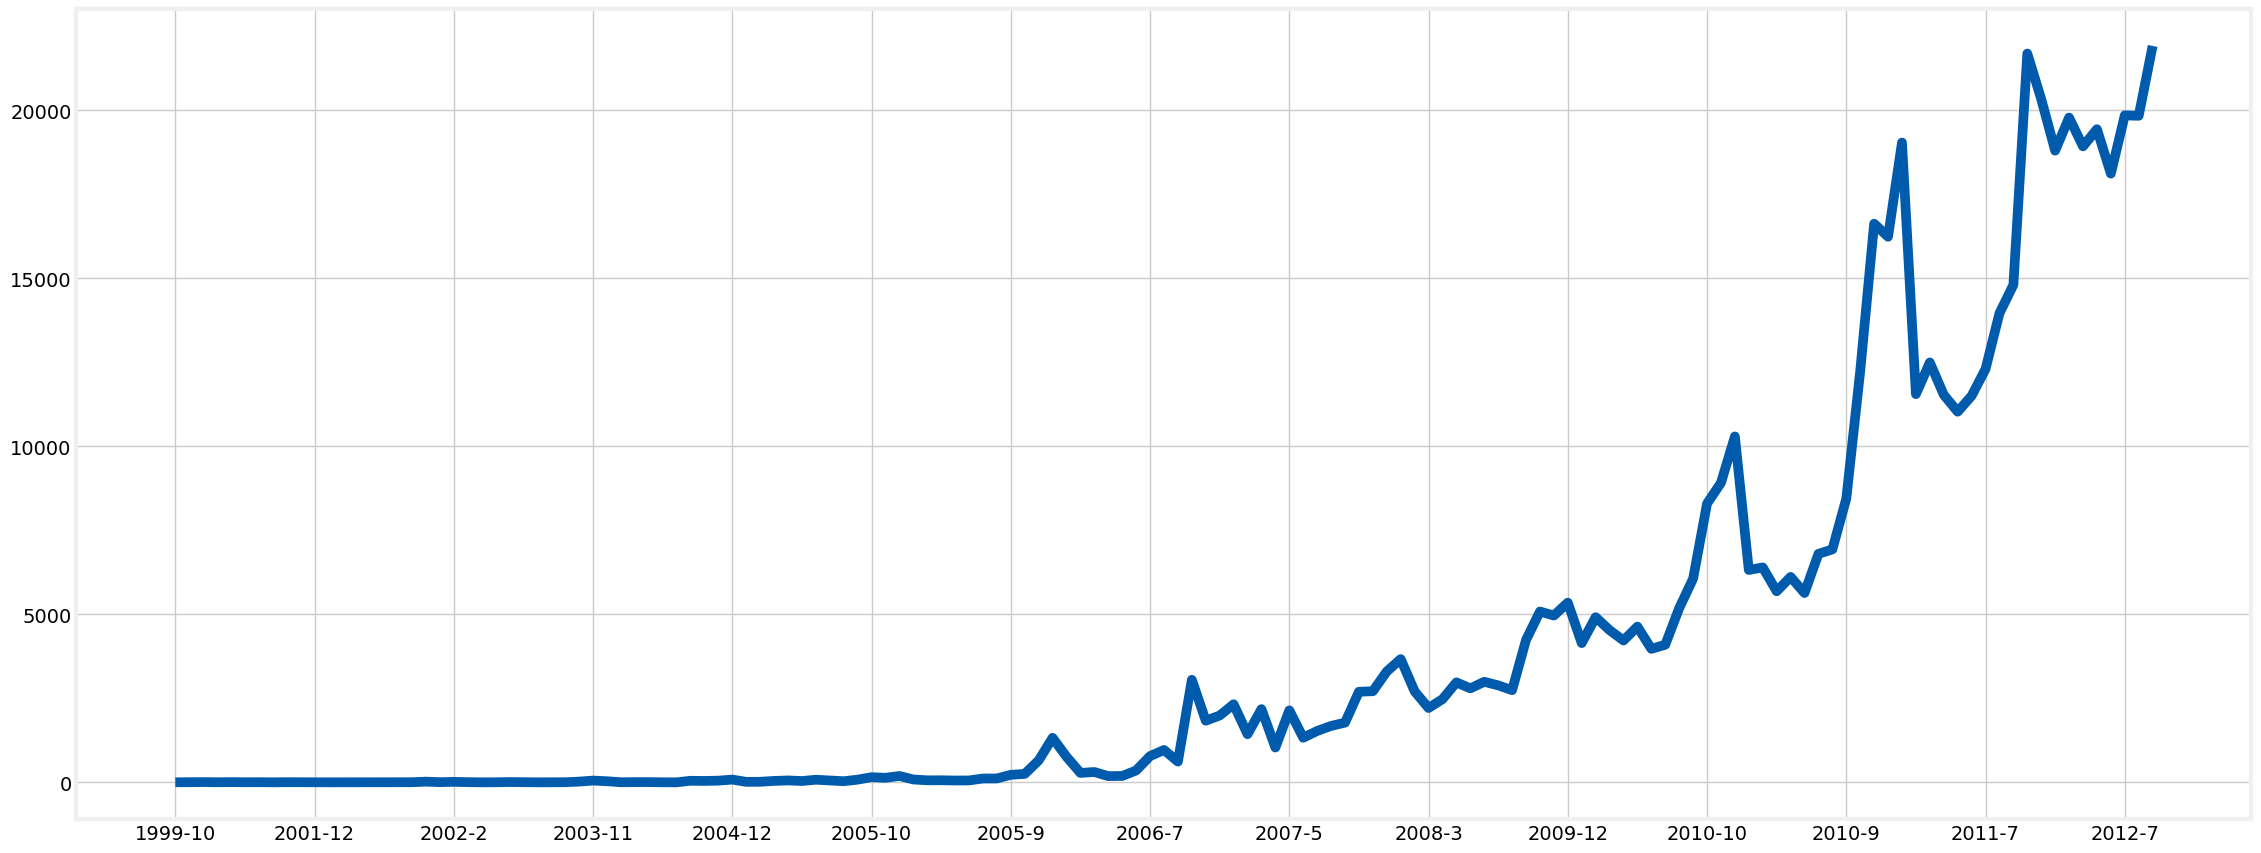

In [113]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#fff'
plt.figure(facecolor='#fff', figsize=(25, 10))

plt.plot(df.groupby(['YYYY-MM']).count()['YYYYMM'].index, df.groupby(['YYYY-MM']).count()['YYYYMM'].values, color="#005bac", linewidth=7)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

In [59]:
# plt.style.use('fivethirtyeight')
# plt.rcParams['axes.facecolor'] = '#fff'
# plt.figure(facecolor='#fff', figsize=(25, 10))

# plt.plot(df.groupby(['YYYY-MM']).count()['YYYYMM'], df.groupby(['YYYY-MM']).Score, color="#005bac", linewidth=7)

In [77]:
df_score_trend = df.groupby(['YYYY-MM', 'Score']).count()['ProductId'].unstack(level=1)

In [87]:
df_score_trend = pd.DataFrame(df_score_trend.to_dict())

In [88]:
df_score_trend

,1,2,3,4,5
1999-10,NaN,NaN,NaN,NaN,2.0
1999-12,NaN,NaN,NaN,NaN,4.0
2000-1,3.0,NaN,NaN,NaN,5.0
2000-10,NaN,NaN,NaN,NaN,3.0
2000-12,NaN,NaN,NaN,NaN,7.0
...,...,...,...,...,...
2012-5,1942.0,1057.0,1562.0,3031.0,11843.0
2012-6,1890.0,1026.0,1515.0,2890.0,10792.0
2012-7,1916.0,1056.0,1544.0,2994.0,12337.0
2012-8,1980.0,1137.0,1555.0,2941.0,12221.0


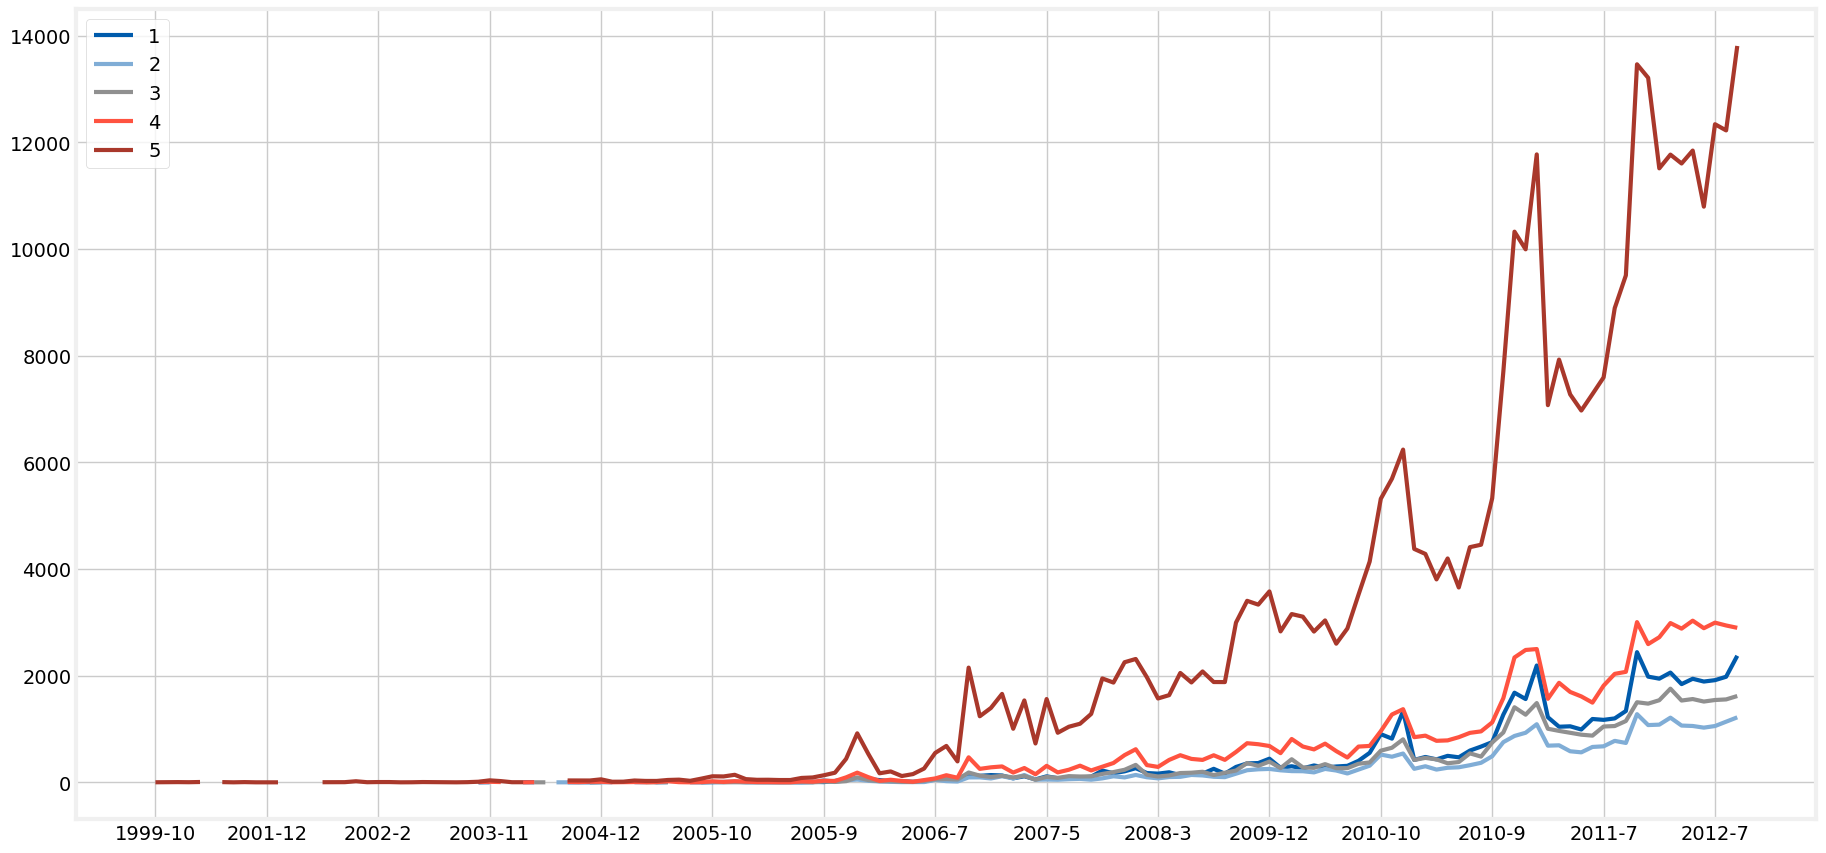

In [112]:
import numpy as np
w = 3

plt.style.use('fivethirtyeight')
plt.figure(facecolor='#fff', figsize=(20, 10))
plt.rcParams['axes.facecolor'] = '#fff'

plt.grid(which='minor')
plt.plot(df_score_trend.index, df_score_trend[1], color="#005bac", linewidth=w, label='1')
plt.plot(df_score_trend.index, df_score_trend[2], color="#80add6", linewidth=w, label='2')
plt.plot(df_score_trend.index, df_score_trend[3], color="#909090", linewidth=w, label='3')
plt.plot(df_score_trend.index, df_score_trend[4], color="#ff5340", linewidth=w, label='4')
plt.plot(df_score_trend.index, df_score_trend[5], color="#a9382b", linewidth=w, label='5')

plt.legend(loc='upper left')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

In [47]:
# df.drop_duplicates(subset=["Text"], keep="first").UserId.value_counts().head(19)

AY12DBB0U420B     329
A3OXHLG6DIBRW8    268
A281NPSIMI1C2R    242
A1Z54EM24Y40LL    211
A1YUL9PCJR3JTY    194
A2MUGFV2TDQ47K    161
A3D6OI36USYOU1    144
AZV26LP92E6WU     129
A2GEZJHBV92EVR    118
AKMEY1BSHSDG7     118
A1IU7S4HCK1XK0    112
A1WX42M589VAMQ    109
A33AQPJYH7UUXR    108
A3F3B1JPACN215    108
AY1EF0GOH80EK     107
A2DPYMNI2HCIOI    106
A2Y8IDC1FKGNJC    105
A2R6RA8FRBS608    103
AQQLWCMRNDFGI      99
Name: UserId, dtype: int64

Very Smooth Coffee - Highly Recommended
Odd Fake Flavor - Not Recommended
Really Good Hot Cocoa - Highly Recommended
Really Good Hot Cocoa - Highly Recommended
Great Diabetic Friendly Candy - Highly Recommended!
True Bacon Flavor
Outstanding Flavor - Highly Recommended
Good Hot Cocoa - Recommended
Very Good Tasting Snack Bars - Recommended
Very Smooth Coffee - Highly Recommended
Very Smooth Coffee - Highly Recommended
Really Good Sugar Substitute - Highly Recommended!
Great For College Students - Highly Recommended
Effective Energy Drink - Recommended
Very Good Jelly Beans - Highly Recommended
Excellent Bold Kona Coffee - Highly Recommended
Great Sugar-Free Pudding! Highly Recommended!
Drinkable Flavored Coffee
Good Tasting Coffee, With A Kick - Recommended!
Good Engery Shots - Recommended
Good Tasting, Diabetic Friendly - Recommended
Very Good Ready To Eat Meal - Highly Recommended
Very Smooth Coffee - Highly Recommended
Good Tasting and Tender, But...
Great Mini-Lollipops - Highly Re

In [39]:
def to_helpfulness_class(row):
    threshold = 0.65
    # if row["HelpfulnessRatio"] > threshold:
    #     return "Helpful"
    # else:
    #     return "Unhelpful"
    if row["HelpfulnessRatio"] > threshold and row["Sentiment"] == 1:
        return "HelpfulPos"
    elif row["HelpfulnessRatio"] > threshold and row["Sentiment"] == -1:
        return "HelpfulNeg"
    elif row["HelpfulnessRatio"] <= threshold and row["Sentiment"] == 1:
        return "UnhelpfulPos"
    elif row["HelpfulnessRatio"] <= threshold and row["Sentiment"] == -1:
        return "UnhelpfulNeg"

df['HelpfulnessClass'] = df.apply(to_helpfulness_class, axis=1)

In [49]:
df.drop_duplicates(subset=["Text"], keep="first").HelpfulnessDenominator.describe()

count    393579.000000
mean          2.203708
std           7.535616
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

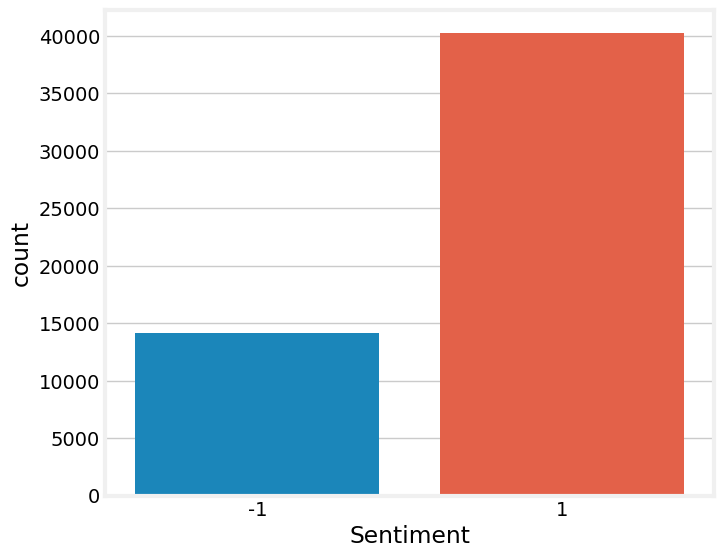

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = '#fff'
plt.figure(facecolor='#fff', figsize=(7, 6))

sns.countplot(x='Sentiment', data=df)